# Customer Segmentation Using K-Means Clustering

## Introduction
Customer segmentation is the process of dividing customers
into groups based on similar characteristics. This helps
businesses understand customer behavior and design
personalized marketing strategies.

In this project, we use unsupervised learning techniques
to segment mall customers based on their spending patterns.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv("Mall_Customers.csv")
df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Dataset Overview
This dataset contains information about mall customers such as:
- CustomerID
- Gender
- Age
- Annual Income (k$)
- Spending Score (1-100)

We will use Annual Income and Spending Score to segment customers
using clustering.


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


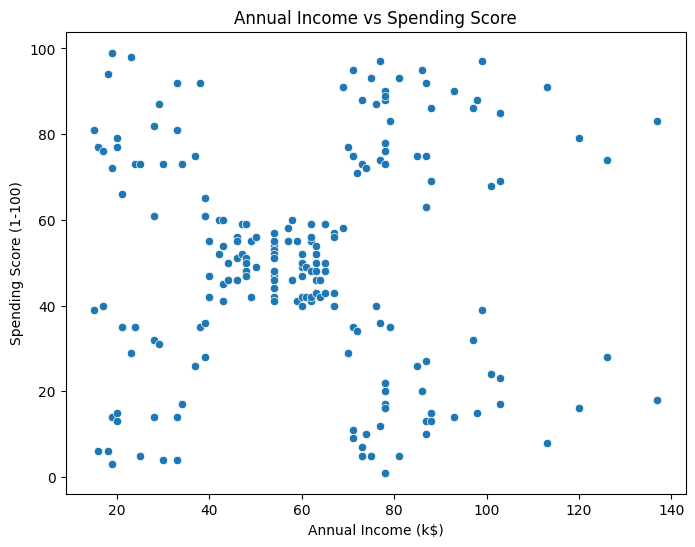

In [5]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df)
plt.title("Annual Income vs Spending Score")
plt.show()


## Exploratory Data Analysis
The scatter plot shows how customer spending behavior varies
with annual income. We expect natural groups (segments) to emerge
in this feature space.


In [8]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]


In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


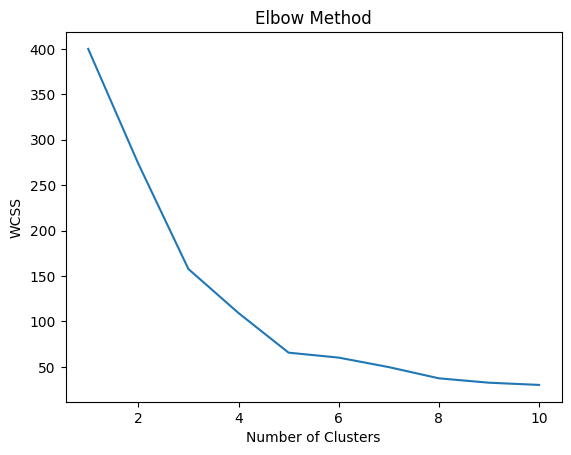

In [11]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()


In [12]:
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


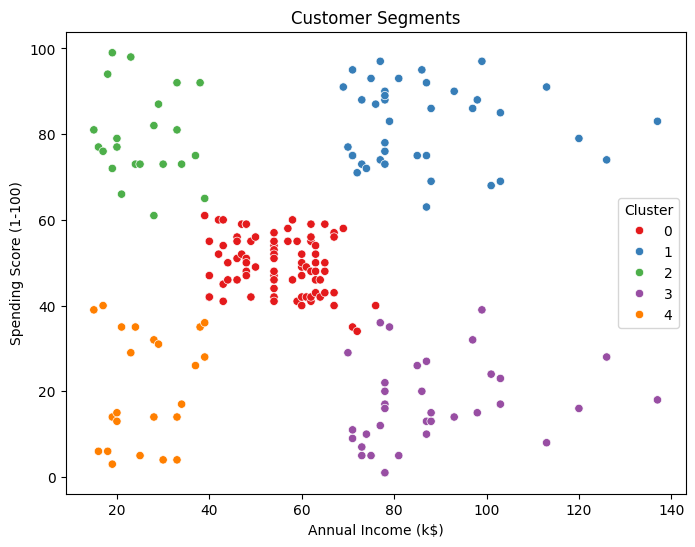

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Cluster',
    data=df,
    palette='Set1'
)
plt.title("Customer Segments")
plt.show()


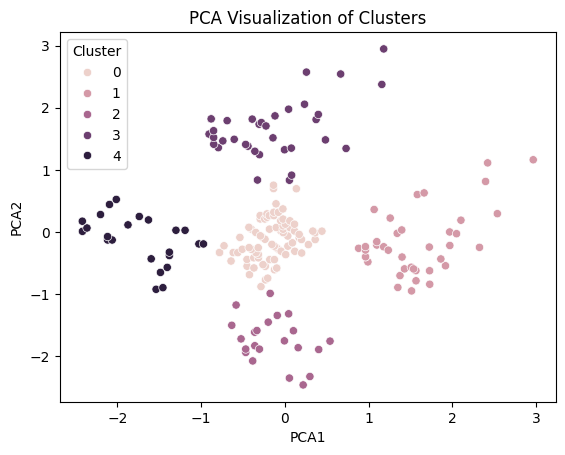

In [15]:
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['PCA1'] = pca_components[:, 0]
df['PCA2'] = pca_components[:, 1]

sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df)
plt.title("PCA Visualization of Clusters")
plt.show()


## Marketing Strategy for Each Segment
- **Cluster 0:** High income, high spenders  
  → Target with premium offers.

- **Cluster 1:** Low income, high spenders  
  → Recommend sales/discounts.

- **Cluster 2:** Mid income, moderate spending  
  → Focus on value deals.

- **Cluster 3:** Low income, low spending  
  → Basic promotions, loyalty programs.

- **Cluster 4:** High income, low spending  
  → Educate about premium services.


## Conclusion
K-Means clustering successfully grouped customers based on
Annual Income and Spending Score into distinct segments. These
segments can help businesses tailor marketing strategies more
effectively to customer behavior.
